In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96% 157M/163M [00:01<00:00, 103MB/s] 
100% 163M/163M [00:01<00:00, 102MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls


data  face-mask-dataset.zip  sample_data


Importing the Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3478.jpg', 'with_mask_2404.jpg', 'with_mask_1190.jpg', 'with_mask_164.jpg', 'with_mask_1475.jpg']
['with_mask_2000.jpg', 'with_mask_1642.jpg', 'with_mask_815.jpg', 'with_mask_1902.jpg', 'with_mask_663.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_985.jpg', 'without_mask_1358.jpg', 'without_mask_839.jpg', 'without_mask_2314.jpg', 'without_mask_3672.jpg']
['without_mask_2320.jpg', 'without_mask_3285.jpg', 'without_mask_2395.jpg', 'without_mask_457.jpg', 'without_mask_1529.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


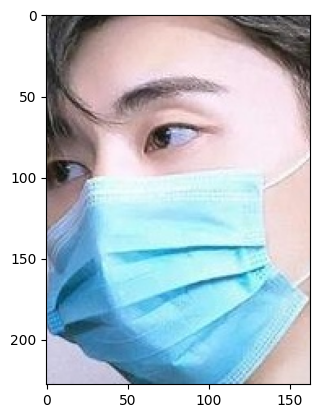

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

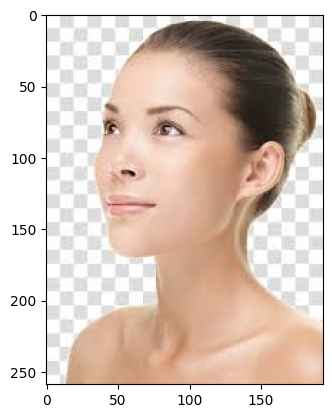

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the Images

Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [215, 229, 229],
        [216, 230, 230],
        [220, 230, 231]],

       [[250, 250, 250],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [209, 226, 227],
        [210, 227, 229],
        [216, 229, 232]],

       [[251, 250, 249],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [205, 223, 225],
        [208, 227, 229],
        [214, 230, 233]],

       ...,

       [[ 73,  62,  65],
        [ 55,  50,  58],
        [ 37,  36,  42],
        ...,
        [250, 242, 238],
        [249, 241, 238],
        [247, 239, 236]],

       [[ 42,  42,  49],
        [ 40,  42,  51],
        [ 34,  36,  43],
        ...,
        [248, 239, 234],
        [248, 239, 235],
        [248, 239, 235]],

       [[ 36,  39,  46],
        [ 40,  43,  51],
        [ 36,  37,  45],
        ...,
        [247, 238, 231],
        [247, 238, 231],
        [247, 238, 231]]], dtype=uint8)
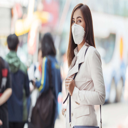

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[115, 112, 119],
        [112, 109, 116],
        [113, 112, 118],
        ...,
        [ 96, 100,  99],
        [104, 106, 105],
        [108, 110, 109]],

       [[107, 104, 111],
        [106, 103, 110],
        [106, 105, 111],
        ...,
        [ 92,  93,  94],
        [ 99,  99,  99],
        [102, 103, 102]],

       [[107, 104, 111],
        [106, 103, 110],
        [105, 104, 110],
        ...,
        [ 89,  90,  92],
        [ 93,  93,  93],
        [ 95,  95,  95]],

       ...,

       [[255, 255, 250],
        [255, 255, 250],
        [252, 252, 245],
        ...,
        [201, 191, 183],
        [226, 217, 211],
        [213, 206, 200]],

       [[255, 255, 251],
        [255, 255, 250],
        [251, 252, 244],
        ...,
        [197, 187, 178],
        [225, 216, 209],
        [223, 216, 210]],

       [[254, 254, 251],
        [254, 255, 250],
        [249, 250, 244],
        ...,
        [194, 185, 176],
        [224, 215, 208],
        [228, 221, 215]]], dtype=uint8)
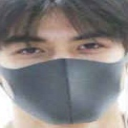

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.45098039, 0.43921569, 0.46666667],
        [0.43921569, 0.42745098, 0.45490196],
        [0.44313725, 0.43921569, 0.4627451 ],
        ...,
        [0.37647059, 0.39215686, 0.38823529],
        [0.40784314, 0.41568627, 0.41176471],
        [0.42352941, 0.43137255, 0.42745098]],

       [[0.41960784, 0.40784314, 0.43529412],
        [0.41568627, 0.40392157, 0.43137255],
        [0.41568627, 0.41176471, 0.43529412],
        ...,
        [0.36078431, 0.36470588, 0.36862745],
        [0.38823529, 0.38823529, 0.38823529],
        [0.4       , 0.40392157, 0.4       ]],

       [[0.41960784, 0.40784314, 0.43529412],
        [0.41568627, 0.40392157, 0.43137255],
        [0.41176471, 0.40784314, 0.43137255],
        ...,
        [0.34901961, 0.35294118, 0.36078431],
        [0.36470588, 0.36470588, 0.36470588],
        [0.37254902, 0.37254902, 0.37254902]],

       ...,

       [[1.        , 1.        , 0.98039216],
        [1.        , 1.        , 0.98039216],
        [0.98823529, 0

Building a Convolutional Neural Networks (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - acc: 0.6984 - loss: 0.6194 - val_acc: 0.8942 - val_loss: 0.2868
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8729 - loss: 0.3184 - val_acc: 0.8909 - val_loss: 0.2493
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9048 - loss: 0.2555 - val_acc: 0.9174 - val_loss: 0.2249
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9307 - loss: 0.1859 - val_acc: 0.9240 - val_loss: 0.2546
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - acc: 0.9367 - loss: 0.1628 - val_acc: 0.9074 - val_loss: 0.2368


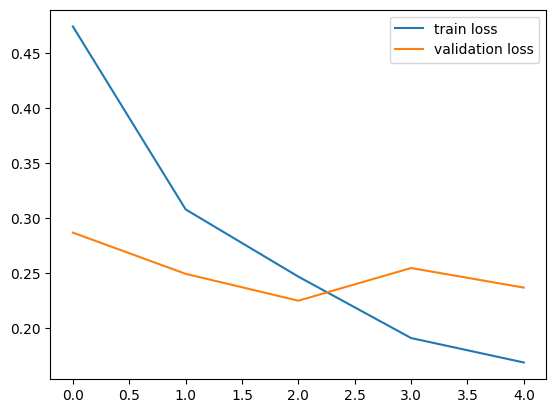

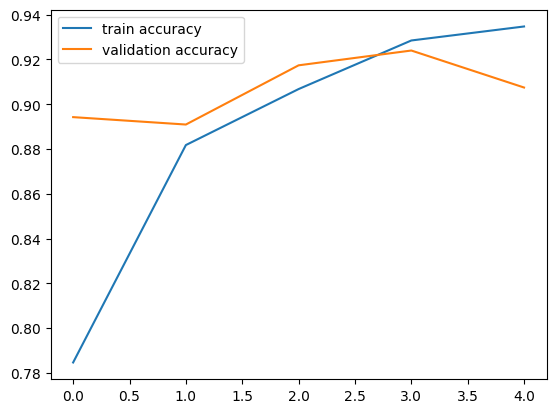

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/istockphoto-1217604429-612x612.jpg


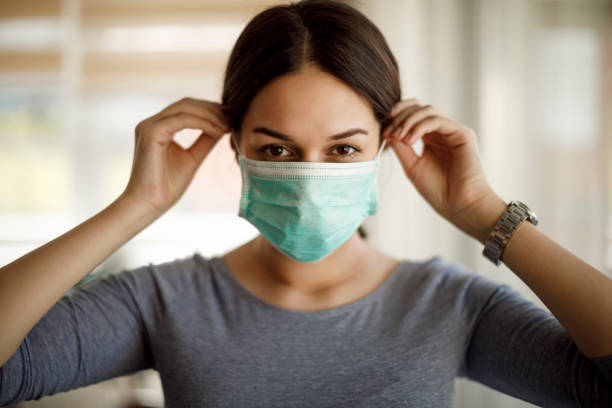

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
[[0.32446235 0.5708886 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/normal.jpg


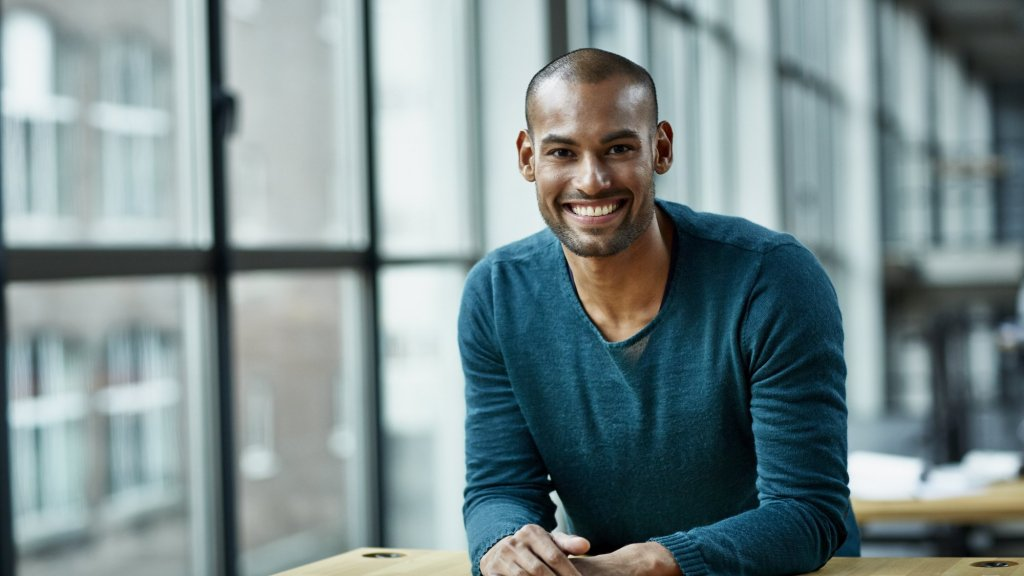

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.29381195 0.57661146]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')